In [12]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [13]:
!pip install ControlBurn==0.0.9
from ControlBurn.ControlBurn import ControlBurnRegressor
!pip install cmake
!pip install cvxopt

In [2]:
wd = os.getcwd()

df = pd.read_excel(wd+'/Data/'+'WTI.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')
df.set_index('Date', inplace=True)

In [3]:
xlsx_files = glob.glob(os.path.join(wd, 'Data',"*.xlsx"))
for f in xlsx_files:
    data_name = f.split("/")[-1].split('.')[0]
    data_name = data_name.replace(" ", "_")
    
    if data_name == 'WTI': continue

    df_temp = pd.read_excel(f)
    df_temp['Date'] = pd.to_datetime(df_temp['Date'])
    df_temp['Date'] = df_temp['Date'].dt.strftime('%m-%d-%Y')
    df_temp.set_index('Date', inplace=True)
    
    df[df_temp.columns[0] + '_' + data_name] = df_temp[df_temp.columns[0]]
    
df.fillna(method='bfill', inplace=True)

df.head(60)

,PX_LAST,PX_VOLUME,PX_LAST_Cass_Freight_Rates,PX_LAST_OPEC_daily_prod,PX_LAST_Europe_Inflation,PX_LAST_US_Inflation,PX_LAST_SPX,PX_LAST_Germany_GDP,PX_LAST_Russia_Industrial_Production,PX_LAST_Russia_daily_prod,...,PX_LAST_US_GDP,PX_LAST_Canada_daily_prod,PX_LAST_Nikkei,PX_LAST_US_IndProd_Index,PX_LAST_Russia_GDP,PX_MID_GT10,PX_LAST_HangSeng,PX_LAST_China_GDP,PX_LAST_Europe_IndProd_exConstruction,PX_LAST_US_daily_prod
Date,,,,,,,,,,,,,,,,,,,,,
10-29-2021,83.57,485727.0,1.184,27490.0,3.4,5.4,4605.38,2.5,6.8,10072.497,...,9.6,4121.0,28892.69,100.0178,10.5,1.555,25377.24,4.9,101.9,11230.181
10-28-2021,82.81,491585.0,1.184,27490.0,3.4,5.4,4596.42,2.5,6.8,10072.497,...,9.6,4121.0,28820.09,100.0178,10.5,1.581,25555.73,4.9,101.9,11230.181
10-27-2021,82.66,529952.0,1.184,27490.0,3.4,5.4,4551.68,2.5,6.8,10072.497,...,9.6,4121.0,29098.24,100.0178,10.5,1.543,25628.74,4.9,101.9,11230.181
10-26-2021,84.65,467716.0,1.184,27490.0,3.4,5.4,4574.79,2.5,6.8,10072.497,...,9.6,4121.0,29106.01,100.0178,10.5,1.609,26038.27,4.9,101.9,11230.181
10-25-2021,83.76,568725.0,1.184,27490.0,3.4,5.4,4566.48,2.5,6.8,10072.497,...,9.6,4121.0,28600.41,100.0178,10.5,1.633,26132.03,4.9,101.9,11230.181
10-22-2021,83.76,465355.0,1.184,27490.0,3.4,5.4,4544.90,2.5,6.8,10072.497,...,9.6,4121.0,28804.85,100.0178,10.5,1.634,26126.93,4.9,101.9,11230.181
10-21-2021,82.50,567503.0,1.184,27490.0,3.4,5.4,4549.78,2.5,6.8,10072.497,...,9.6,4121.0,28708.58,100.0178,10.5,1.703,26017.53,4.9,101.9,11230.181
10-20-2021,83.87,25720.0,1.184,27490.0,3.4,5.4,4536.19,2.5,6.8,10072.497,...,9.6,4121.0,29255.55,100.0178,10.5,1.658,26136.02,4.9,101.9,11230.181
10-19-2021,82.96,82607.0,1.184,27490.0,3.4,5.4,4519.63,2.5,6.8,10072.497,...,9.6,4121.0,29215.52,100.0178,10.5,1.639,25787.21,4.9,101.9,11230.181


In [4]:
cols = {
    0:"daily",
    1:"daily",
    2:"monthly",
    3:"monthly",
    4:"monthly",
    5:"monthly",
    6:"daily",
    7:"quarterly",
    8:"monthly",
    9:"monthly",
    10:"daily",
    11:"daily",
    12:"daily",
    13:"quarterly",
    14:"daily",
    15:"quarterly",
    16:"monthly",
    17:"daily",
    18:"monthly",
    19:"quarterly",
    20:"daily",
    21:"daily",
    22:"quarterly",
    23:"monthly",
    24:"monthly",
}

Text(0, 0.5, 'Price')

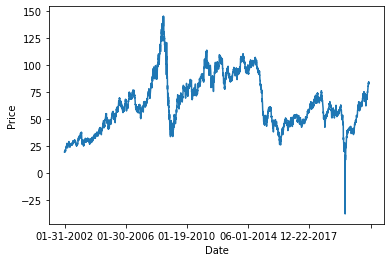

In [5]:
df_t = df.copy()
df_t = df_t.dropna()
ax = df_t[df_t.columns[0]][::-1].plot()
ax.set_ylabel("Price")

In [6]:
df_t['returns'] = df_t['PX_LAST']/df_t['PX_LAST'].shift(-1) - 1

def ma(df, column, freq = "monthly"):
    if freq == "monthly":
        df[df.columns[column] + '_SMA22'] = df[df.columns[column]]
        for i in range(0, len(df[df.columns[column]])-22):
            df.iloc[i, -1] = np.mean(df.iloc[i:i+22, -2])
    elif freq == "quarterly":
        df[df.columns[column] + '_SMA65'] = df[df.columns[column]]
        for i in range(0, len(df[df.columns[column]])-65):
            df.iloc[i, -1] = np.mean(df.iloc[i:i+65, -2])
    return df

def daily_lag(df, column, lag):
    lag = lag+1
    for i in range(1, lag):
        df[df.columns[column] + '_t-' + str(i)] = df[df.columns[column]].shift(-i)
    
    return df

def lag_data(df, column, freq = "monthly"):
    if freq == "monthly":
        df[df.columns[column] + '_M'] = df[df.columns[column]].shift(-22)
    elif freq == "quarterly":
        df[df.columns[column] + '_Q'] = df[df.columns[column]].shift(-65)
    elif freq == "weekly":
        df[df.columns[column] + '_W'] = df[df.columns[column]].shift(-10)
    else:
        raise ValueError("Frequency invalid")
        
    return df


In [7]:
df_trial = df_t.copy()

for i in range(0, len(df.columns)):
    if cols[i] == "daily":
        df_trial = daily_lag(df_trial, i, 3)
    else:
        df_trial = lag_data(df_trial, i, cols[i])
        df_trial = ma(df_trial, i, cols[i])

df_trial.head(60)

,PX_LAST,PX_VOLUME,PX_LAST_Cass_Freight_Rates,PX_LAST_OPEC_daily_prod,PX_LAST_Europe_Inflation,PX_LAST_US_Inflation,PX_LAST_SPX,PX_LAST_Germany_GDP,PX_LAST_Russia_Industrial_Production,PX_LAST_Russia_daily_prod,...,PX_MID_GT10_t-3,PX_LAST_HangSeng_t-1,PX_LAST_HangSeng_t-2,PX_LAST_HangSeng_t-3,PX_LAST_China_GDP_Q,PX_LAST_China_GDP_SMA65,PX_LAST_Europe_IndProd_exConstruction_M,PX_LAST_Europe_IndProd_exConstruction_SMA22,PX_LAST_US_daily_prod_M,PX_LAST_US_daily_prod_SMA22
Date,,,,,,,,,,,,,,,,,,,,,
10-29-2021,83.57,485727.0,1.184,27490.0,3.4,5.4,4605.38,2.5,6.8,10072.497,...,1.609,25555.73,25628.74,26038.27,7.9,14.940000,101.9,101.913636,11230.181,11230.181
10-28-2021,82.81,491585.0,1.184,27490.0,3.4,5.4,4596.42,2.5,6.8,10072.497,...,1.633,25628.74,26038.27,26132.03,7.9,15.100000,101.9,101.927273,11230.181,11230.181
10-27-2021,82.66,529952.0,1.184,27490.0,3.4,5.4,4551.68,2.5,6.8,10072.497,...,1.634,26038.27,26132.03,26126.93,7.9,15.260000,101.9,101.940909,11230.181,11230.181
10-26-2021,84.65,467716.0,1.184,27490.0,3.4,5.4,4574.79,2.5,6.8,10072.497,...,1.703,26132.03,26126.93,26017.53,7.9,15.420000,101.9,101.954545,11230.181,11230.181
10-25-2021,83.76,568725.0,1.184,27490.0,3.4,5.4,4566.48,2.5,6.8,10072.497,...,1.658,26126.93,26017.53,26136.02,7.9,15.580000,101.9,101.968182,11230.181,11230.181
10-22-2021,83.76,465355.0,1.184,27490.0,3.4,5.4,4544.90,2.5,6.8,10072.497,...,1.639,26017.53,26136.02,25787.21,7.9,15.740000,101.9,101.981818,11230.181,11230.181
10-21-2021,82.50,567503.0,1.184,27490.0,3.4,5.4,4549.78,2.5,6.8,10072.497,...,1.602,26136.02,25787.21,25409.75,7.9,15.900000,101.9,101.995455,11230.181,11230.181
10-20-2021,83.87,25720.0,1.184,27490.0,3.4,5.4,4536.19,2.5,6.8,10072.497,...,1.572,25787.21,25409.75,25330.96,7.9,16.060000,101.9,102.009091,11230.181,11230.181
10-19-2021,82.96,82607.0,1.184,27490.0,3.4,5.4,4519.63,2.5,6.8,10072.497,...,1.512,25409.75,25330.96,26605.62,7.9,16.220000,101.9,102.022727,11230.181,11230.181


### Final Feature Sets:

In [8]:
df_ret = df_trial.iloc[:,25:]
df_ret['returns_lag'] = df_ret['returns'].shift(-1)
df_ret = df_ret.dropna()
df_ret['offset'] = np.ones(len(df_ret['returns_lag']))
df_ret = df_ret.iloc[::-1]

df_prices = df_trial.iloc[:,26:]
df_prices['PX_LAST'] = df_trial['PX_LAST']
df_prices['offset'] = np.ones(len(df_prices['PX_LAST']))
df_prices = df_prices.dropna()
df_prices = df_prices.iloc[::-1]

df_prices

,PX_LAST_t-1,PX_LAST_t-2,PX_LAST_t-3,PX_VOLUME_t-1,PX_VOLUME_t-2,PX_VOLUME_t-3,PX_LAST_Cass_Freight_Rates_M,PX_LAST_Cass_Freight_Rates_SMA22,PX_LAST_OPEC_daily_prod_M,PX_LAST_OPEC_daily_prod_SMA22,...,PX_LAST_HangSeng_t-2,PX_LAST_HangSeng_t-3,PX_LAST_China_GDP_Q,PX_LAST_China_GDP_SMA65,PX_LAST_Europe_IndProd_exConstruction_M,PX_LAST_Europe_IndProd_exConstruction_SMA22,PX_LAST_US_daily_prod_M,PX_LAST_US_daily_prod_SMA22,PX_LAST,offset
Date,,,,,,,,,,,,,,,,,,,,,
06-05-2002,26.62,26.24,26.75,81485.0,118873.0,87572.0,0.935,0.935000,24950.0,24950.000000,...,10609.19,11497.58,7.5,7.50,94.5,94.500000,5881.000,5881.000,26.12,1.0
07-05-2002,26.12,26.62,26.24,70733.0,81485.0,118873.0,0.935,0.935000,24950.0,24950.000000,...,10985.84,10609.19,7.5,7.50,94.5,94.500000,5881.000,5881.000,26.63,1.0
08-05-2002,26.63,26.12,26.62,110038.0,70733.0,81485.0,0.935,0.935000,24950.0,24950.000000,...,11402.38,10985.84,7.5,7.50,94.5,94.500000,5881.000,5881.000,27.85,1.0
09-05-2002,27.85,26.63,26.12,135330.0,110038.0,70733.0,0.935,0.935000,24950.0,24950.000000,...,10806.16,11402.38,7.5,7.50,94.5,94.500000,5881.000,5881.000,27.68,1.0
10-05-2002,27.68,27.85,26.63,103765.0,135330.0,110038.0,0.935,0.935000,24950.0,24950.000000,...,9862.33,10806.16,7.5,7.50,94.5,94.500000,5881.000,5881.000,27.99,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-25-2021,83.76,82.50,83.87,465355.0,567503.0,25720.0,1.234,1.233318,27130.0,26964.090909,...,26017.53,26136.02,7.9,15.58,101.9,101.968182,11230.181,11230.181,83.76,1.0
10-26-2021,83.76,83.76,82.50,568725.0,465355.0,567503.0,1.234,1.233455,27130.0,26997.272727,...,26126.93,26017.53,7.9,15.42,101.9,101.954545,11230.181,11230.181,84.65,1.0
10-27-2021,84.65,83.76,83.76,467716.0,568725.0,465355.0,1.234,1.233591,27130.0,27030.454545,...,26132.03,26126.93,7.9,15.26,101.9,101.940909,11230.181,11230.181,82.66,1.0


### Preliminary Regression - Supply Side

In [78]:
features = ['PX_LAST_OPEC_daily_prod_SMA22', 'PX_LAST_US_daily_prod_SMA22', 'PX_LAST_Russia_daily_prod_SMA22', 'PX_LAST_Canada_daily_prod_SMA22', 'offset']
X_prelim = df_prices[features]
y_prelim = df_prices['PX_LAST']

In [79]:
xTrain, xTest, yTrain, yTest = train_test_split(X_prelim, y_prelim, test_size=0.33, random_state=42)

In [80]:
print(len(xTrain), len(xTest), len(yTrain), len(yTest))

model = sm.OLS(yTrain, xTrain).fit()
w = model.params
print(w)

predTrain = xTrain.dot(w)
p_Train = np.array(predTrain)
train_error = np.sqrt(np.mean(np.power((np.array(yTrain) - p_Train), 2)))
tr_err_met = np.sqrt(mean_squared_error(yTrain, p_Train))
#print(metrics.mean_squared_error(y_true, y_pred))

predTest = xTest.dot(w)
p_Test = np.array(predTest)
test_error = np.sqrt(np.mean(np.power((np.array(yTest) - p_Test), 2)))
te_err_met = np.sqrt(mean_squared_error(yTest, p_Test))

#print(np.array(predTrain))
#print(np.array(predTest))

#print(predTest)

print("Train RMSE = {}".format(train_error))
print("Test RMSE = {}".format(test_error))
print("Train RMSE = {}".format(tr_err_met))
print("Test RMSE = {}".format(te_err_met))

3287 1620 3287 1620
PX_LAST_OPEC_daily_prod_SMA22      -0.003862
PX_LAST_US_daily_prod_SMA22        -0.014346
PX_LAST_Russia_daily_prod_SMA22     0.026471
PX_LAST_Canada_daily_prod_SMA22     0.021219
offset                            -36.807041
dtype: float64
Train RMSE = 18.021938281662784
Test RMSE = 18.652471443996838
Train RMSE = 18.021938281662784
Test RMSE = 18.652471443996838


(-10.0, 150.0)

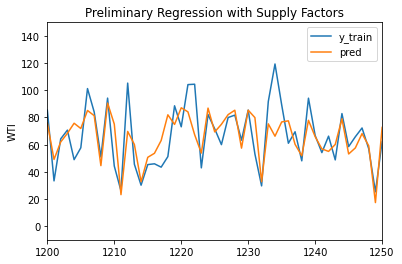

In [150]:
pred_temp = xTrain.dot(w)
#print(np.max(pred_temp))
#print(np.min(pred_temp))
#print(np.max(yTrain))
#print(np.min(yTrain))
plt.plot(np.array(yTrain), label = 'y_train' )
plt.plot(np.array(pred_temp), label='pred')
plt.ylabel("WTI")
plt.title("Preliminary Regression with Supply Factors")
plt.legend()
plt.xlim(1200, 1250)
plt.ylim(-10, 150)

(-10.0, 150.0)

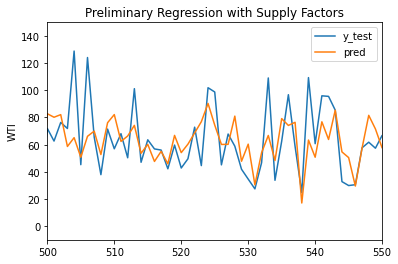

In [149]:
pred_temp = xTest.dot(w)
#print(np.max(pred_temp))
#print(np.min(pred_temp))
#print(np.max(yTrain))
#print(np.min(yTrain))
plt.plot(np.array(yTest), label = 'y_test' )
plt.plot(np.array(pred_temp), label='pred')
plt.ylabel("WTI")
plt.title("Preliminary Regression with Supply Factors")
plt.legend()
plt.xlim(500, 550)
plt.ylim(-10, 150)

(-50.0, 150.0)

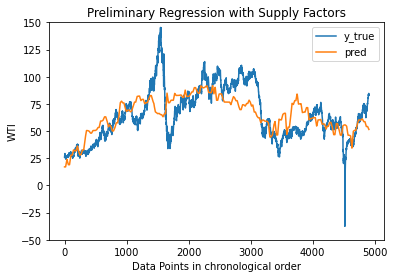

In [140]:
pred_temp5 = X_prelim.dot(w)
#print(np.max(pred_temp))
#print(np.min(pred_temp))
#print(np.max(yTrain))
#print(np.min(yTrain))
plt.plot(np.array(y_prelim), label = 'y_true' )
plt.plot(np.array(pred_temp5), label='pred')
plt.ylabel("WTI")
plt.xlabel("Data Points in chronological order")
plt.title("Preliminary Regression with Supply Factors")
plt.legend()
#plt.xlim(2500, 5500)
plt.ylim(-50, 150)

### Next Regression - All Economic Factors

In [152]:
y_2 = df_prices.loc[:,df_prices.columns.isin(['PX_LAST'])]
X_2 = df_prices.loc[:,~df_prices.columns.isin(['PX_LAST', 'PX_LAST_t-1', 'PX_LAST_t-2', 'PX_LAST_t-3'])]

In [153]:
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(X_2, y_2, test_size=0.33, random_state=42)
"""
xTrainScaler = preprocessing.StandardScaler()
xTrain2 = xTrainScaler.fit_transform(xTrain2)
xTrain2 = pd.DataFrame(xTrain2,columns = X_2.columns)
xTest2 = preprocessing.StandardScaler().fit_transform(xTest2)
xTest2 = pd.DataFrame(xTest2,columns = X_2.columns)
yTrain2 = preprocessing.StandardScaler().fit_transform(yTrain2.values.reshape(-1, 1))
yTest2 = preprocessing.StandardScaler().fit_transform(yTest2.values.reshape(-1, 1))
yTrain2 = pd.Series(yTrain2.flatten())
yTrain2.index = xTrain2.index
yTest2 = pd.Series(yTest2.flatten())
yTest2.index = xTest2.index
"""

'\nxTrainScaler = preprocessing.StandardScaler()\nxTrain2 = xTrainScaler.fit_transform(xTrain2)\nxTrain2 = pd.DataFrame(xTrain2,columns = X_2.columns)\nxTest2 = preprocessing.StandardScaler().fit_transform(xTest2)\nxTest2 = pd.DataFrame(xTest2,columns = X_2.columns)\nyTrain2 = preprocessing.StandardScaler().fit_transform(yTrain2.values.reshape(-1, 1))\nyTest2 = preprocessing.StandardScaler().fit_transform(yTest2.values.reshape(-1, 1))\nyTrain2 = pd.Series(yTrain2.flatten())\nyTrain2.index = xTrain2.index\nyTest2 = pd.Series(yTest2.flatten())\nyTest2.index = xTest2.index\n'

In [154]:
print(len(xTrain2), len(xTest2), len(yTrain2), len(yTest2))

model = sm.OLS(yTrain2, xTrain2).fit()
w2 = model.params
print(w2)

predTrain2 = xTrain2.dot(w2)
p_Train2 = np.array(predTrain2)
tr_err_met2 = np.sqrt(mean_squared_error(yTrain2, p_Train2))

predTest2 = xTest2.dot(w2)
p_Test2 = np.array(predTest2)
te_err_met2 = np.sqrt(mean_squared_error(yTest2, p_Test2))

#print(np.array(predTrain))
#print(np.array(predTest))

#print(predTest)

print("Train RMSE = {}".format(tr_err_met2))
print("Test RMSE = {}".format(te_err_met2))

3287 1620 3287 1620
PX_VOLUME_t-1                                  -0.000003
PX_VOLUME_t-2                                  -0.000004
PX_VOLUME_t-3                                  -0.000002
PX_LAST_Cass_Freight_Rates_M                   11.110488
PX_LAST_Cass_Freight_Rates_SMA22              -20.245798
PX_LAST_OPEC_daily_prod_M                       0.000565
PX_LAST_OPEC_daily_prod_SMA22                  -0.003550
PX_LAST_Europe_Inflation_M                      7.064503
PX_LAST_Europe_Inflation_SMA22                  3.156021
PX_LAST_US_Inflation_M                          1.420609
PX_LAST_US_Inflation_SMA22                     -3.259724
PX_LAST_SPX_t-1                                -0.013716
PX_LAST_SPX_t-2                                 0.010232
PX_LAST_SPX_t-3                                -0.010997
PX_LAST_Germany_GDP_Q                           2.649834
PX_LAST_Germany_GDP_SMA65                      -1.602342
PX_LAST_Russia_Industrial_Production_M          0.118444
PX_LAST_Rus

(1200.0, 1250.0)

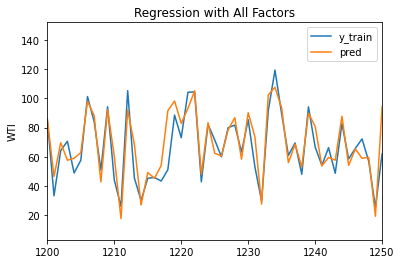

In [155]:
pred_temp2 = xTrain2.dot(w2)
#print(np.max(pred_temp))
#print(np.min(pred_temp))
#print(np.max(yTrain))
#print(np.min(yTrain))
plt.plot(np.array(yTrain2), label = 'y_train' )
plt.plot(np.array(pred_temp2), label='pred')
plt.ylabel("WTI")
plt.title("Regression with All Factors")
plt.legend()
plt.xlim(1200, 1250)
#plt.ylim(-10, 150)

(500.0, 750.0)

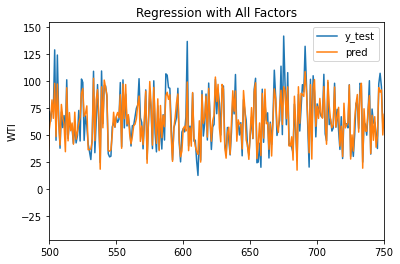

In [156]:
pred_temp3 = xTest2.dot(w2)
#print(np.max(pred_temp))
#print(np.min(pred_temp))
#print(np.max(yTrain))
#print(np.min(yTrain))
plt.plot(np.array(yTest2), label = 'y_test' )
plt.plot(np.array(pred_temp3), label='pred')
plt.ylabel("WTI")
plt.title("Regression with All Factors")
plt.legend()
plt.xlim(500, 750)
#plt.ylim(-10, 120)

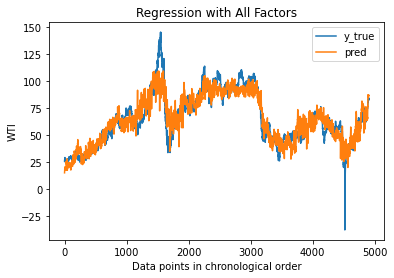

In [157]:
pred_temp4 = X_2.dot(w2)
#print(np.max(pred_temp))
#print(np.min(pred_temp))
#print(np.max(yTrain))
#print(np.min(yTrain))
plt.plot(np.array(y_2), label = 'y_true' )
plt.plot(np.array(pred_temp4), label='pred')
plt.ylabel("WTI")
plt.xlabel("Data points in chronological order")
plt.title("Regression with All Factors")
plt.legend()
#plt.xlim(4500, 4520)
#plt.ylim(-50, 120)

In [116]:
cb = ControlBurnRegressor(build_forest_method = 'doublebagboost', alpha = 0.02)
cb.fit(xTrain2,yTrain2)

print('Number of trees grown: ' + str(len(cb.forest)))
print('Number of trees selected: ' + str(len(cb.subforest)))
print('Features selected ' + str(cb.features_selected_))

pred = cb.predict(xTest2)
print('MSE of polished model: ' + str(mean_squared_error(yTest2,pred)))

Number of trees grown: 47
Number of trees selected: 16
Features selected ['PX_LAST_US_Inflation_M', 'PX_LAST_US_Inflation_SMA22', 'PX_LAST_Russia_Industrial_Production_M', 'PX_LAST_USDEUR_t-1', 'PX_LAST_USDEUR_t-2', 'PX_LAST_USDEUR_t-3', 'PX_LAST_DAX_t-1', 'PX_LAST_DAX_t-2', 'PX_LAST_US_GDP_Q', 'PX_MID_GT10_t-2', 'PX_MID_GT10_t-3', 'PX_LAST_HangSeng_t-1', 'PX_LAST_HangSeng_t-2', 'PX_LAST_China_GDP_SMA65', 'PX_LAST_Europe_IndProd_exConstruction_SMA22', 'PX_LAST_US_daily_prod_SMA22']
MSE of polished model: 0.04262596536243951


In [126]:
features = ['PX_LAST_US_Inflation_M', 'PX_LAST_US_Inflation_SMA22', 'PX_LAST_Russia_Industrial_Production_M', 'PX_LAST_USDEUR_t-1', 'PX_LAST_USDEUR_t-2', 'PX_LAST_USDEUR_t-3', 'PX_LAST_DAX_t-1', 'PX_LAST_DAX_t-2', 'PX_LAST_US_GDP_Q', 'PX_MID_GT10_t-2', 'PX_MID_GT10_t-3', 'PX_LAST_HangSeng_t-1', 'PX_LAST_HangSeng_t-2', 'PX_LAST_China_GDP_SMA65', 'PX_LAST_Europe_IndProd_exConstruction_SMA22', 'PX_LAST_US_daily_prod_SMA22', 'offset']
X_cb = df_prices[features]
y_cb = df_prices['PX_LAST']

In [127]:
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(X_cb, y_cb, test_size=0.33, random_state=42)
"""
xTrainScaler = preprocessing.StandardScaler()
xTrain2 = xTrainScaler.fit_transform(xTrain2)
xTrain2 = pd.DataFrame(xTrain2,columns = X_cb.columns)
xTest2 = preprocessing.StandardScaler().fit_transform(xTest2)
xTest2 = pd.DataFrame(xTest2,columns = X_cb.columns)
yTrain2 = preprocessing.StandardScaler().fit_transform(yTrain2.values.reshape(-1, 1))
yTest2 = preprocessing.StandardScaler().fit_transform(yTest2.values.reshape(-1, 1))
yTrain2 = pd.Series(yTrain2.flatten())
yTrain2.index = xTrain2.index
yTest2 = pd.Series(yTest2.flatten())
yTest2.index = xTest2.index
"""

'\nxTrainScaler = preprocessing.StandardScaler()\nxTrain2 = xTrainScaler.fit_transform(xTrain2)\nxTrain2 = pd.DataFrame(xTrain2,columns = X_cb.columns)\nxTest2 = preprocessing.StandardScaler().fit_transform(xTest2)\nxTest2 = pd.DataFrame(xTest2,columns = X_cb.columns)\nyTrain2 = preprocessing.StandardScaler().fit_transform(yTrain2.values.reshape(-1, 1))\nyTest2 = preprocessing.StandardScaler().fit_transform(yTest2.values.reshape(-1, 1))\nyTrain2 = pd.Series(yTrain2.flatten())\nyTrain2.index = xTrain2.index\nyTest2 = pd.Series(yTest2.flatten())\nyTest2.index = xTest2.index\n'

In [129]:
print(len(xTrain2), len(xTest2), len(yTrain2), len(yTest2))

model = sm.OLS(yTrain2, xTrain2).fit()
wcb = model.params
print(wcb)

predTrain2 = xTrain2.dot(wcb)
p_Train2 = np.array(predTrain2)
tr_err_met2 = np.sqrt(mean_squared_error(yTrain2, p_Train2))

predTest2 = xTest2.dot(wcb)
p_Test2 = np.array(predTest2)
te_err_met2 = np.sqrt(mean_squared_error(yTest2, p_Test2))

#print(np.array(predTrain))
#print(np.array(predTest))

#print(predTest)

print("Train RMSE = {}".format(tr_err_met2))
print("Test RMSE = {}".format(te_err_met2))

3287 1620 3287 1620
PX_LAST_US_Inflation_M                           8.387779
PX_LAST_US_Inflation_SMA22                      -5.198686
PX_LAST_Russia_Industrial_Production_M          -0.146670
PX_LAST_USDEUR_t-1                             -49.899478
PX_LAST_USDEUR_t-2                               0.937547
PX_LAST_USDEUR_t-3                             -69.467445
PX_LAST_DAX_t-1                                 -0.000761
PX_LAST_DAX_t-2                                 -0.000398
PX_LAST_US_GDP_Q                                 0.694360
PX_MID_GT10_t-2                                 -3.384701
PX_MID_GT10_t-3                                 -2.278971
PX_LAST_HangSeng_t-1                             0.001139
PX_LAST_HangSeng_t-2                             0.001565
PX_LAST_China_GDP_SMA65                          0.576535
PX_LAST_Europe_IndProd_exConstruction_SMA22     -0.360607
PX_LAST_US_daily_prod_SMA22                     -0.003933
offset                                         182.2

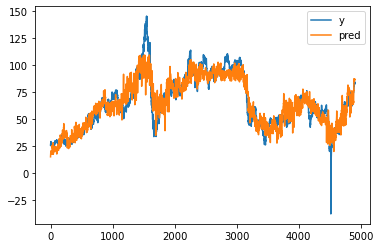

In [130]:
pred_cb = X_cb.dot(wcb)
#print(np.max(pred_temp))
#print(np.min(pred_temp))
#print(np.max(yTrain))
#print(np.min(yTrain))
plt.plot(np.array(y_cb), label = 'y' )
plt.plot(np.array(pred_temp4), label='pred')
plt.legend()
#plt.xlim(4500, 4520)
#plt.ylim(-50, 120)

### Next Regression - Include lagged prices

In [96]:
y_3 = df_prices.loc[:,df_prices.columns.isin(['PX_LAST'])]
X_3 = df_prices.loc[:,~df_prices.columns.isin(['PX_LAST'])]

In [97]:
xTrain3, xTest3, yTrain3, yTest3 = train_test_split(X_3, y_3, test_size=0.33, random_state=42)

In [98]:
print(len(xTrain3), len(xTest3), len(yTrain3), len(yTest3))

model = sm.OLS(yTrain3, xTrain3).fit()
w3 = model.params
print(w3)

predTrain3 = xTrain3.dot(w3)
p_Train3 = np.array(predTrain3)
tr_err_met3 = np.sqrt(mean_squared_error(yTrain3, p_Train3))

predTest3 = xTest3.dot(w3)
p_Test3 = np.array(predTest3)
te_err_met3 = np.sqrt(mean_squared_error(yTest3, p_Test3))

#print(np.array(predTrain))
#print(np.array(predTest))

#print(predTest)

print("Train RMSE = {}".format(tr_err_met3))
print("Test RMSE = {}".format(te_err_met3))

3287 1620 3287 1620
PX_LAST_t-1                                    6.861659e-01
PX_LAST_t-2                                    2.550212e-01
PX_LAST_t-3                                    4.973656e-02
PX_VOLUME_t-1                                 -3.681597e-07
PX_VOLUME_t-2                                 -7.975347e-08
                                                   ...     
PX_LAST_Europe_IndProd_exConstruction_M       -3.052825e-02
PX_LAST_Europe_IndProd_exConstruction_SMA22    2.236627e-02
PX_LAST_US_daily_prod_M                        1.116290e-04
PX_LAST_US_daily_prod_SMA22                   -4.292376e-04
offset                                        -4.375899e+00
Length: 61, dtype: float64
Train RMSE = 1.5918336709832421
Test RMSE = 2.0915133342071353


(-10.0, 150.0)

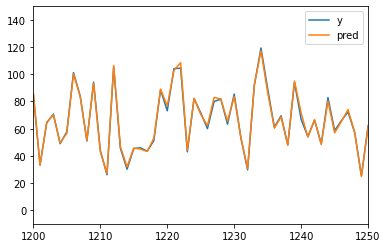

In [100]:
pred_temp5 = xTrain3.dot(w3)
#print(np.max(pred_temp))
#print(np.min(pred_temp))
#print(np.max(yTrain))
#print(np.min(yTrain))
plt.plot(np.array(yTrain3), label = 'y' )
plt.plot(np.array(pred_temp5), label='pred')
plt.legend()
plt.xlim(1200, 1250)
plt.ylim(-10, 150)

(-10.0, 120.0)

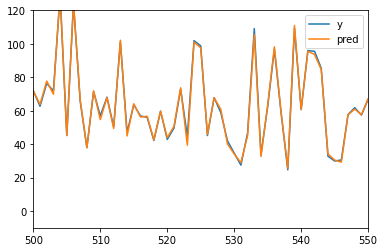

In [101]:
pred_temp6 = xTest3.dot(w3)
#print(np.max(pred_temp))
#print(np.min(pred_temp))
#print(np.max(yTrain))
#print(np.min(yTrain))
plt.plot(np.array(yTest3), label = 'y' )
plt.plot(np.array(pred_temp6), label='pred')
plt.legend()
plt.xlim(500, 550)
plt.ylim(-10, 120)

(-50.0, 120.0)

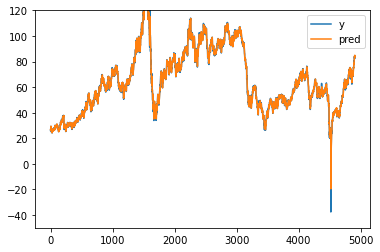

In [102]:
pred_temp7 = X_3.dot(w3)
#print(np.max(pred_temp))
#print(np.min(pred_temp))
#print(np.max(yTrain))
#print(np.min(yTrain))
plt.plot(np.array(y_3), label = 'y' )
plt.plot(np.array(pred_temp7), label='pred')
plt.legend()
#plt.xlim(4500, 4520)
plt.ylim(-50, 120)